In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import shapiro
import pandas as pd
import scipy.stats as stats
from scipy import stats
from statsmodels.stats import weightstats as stests
import scipy.stats as ss
import numpy as np
import itertools

pd.set_option('display.max_columns', 500)


In [ ]:
path = '/content/billionaires.csv'
df = pd.read_csv(path)
df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,United States,USA,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,United States,USA,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,United States,USA,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,USA,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,USA,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


## Important Functions

In [ ]:
# You can change inclination, figure size anything by just passing the parameter values
# This function would give you counts for each of the labels, you just have to pass the dataframe, column name, how do you want to see vertical or horizontal
def univariate_valueplot(data, col, inclination, figsize, color):
    fig, ax = plt.subplots(figsize=(figsize))

    if inclination == "horizontal":
        
        data[col].value_counts().plot(kind = "barh",color = color,  ax = ax);
        plt.title(f"{col} Vs Frequency"); 
        plt.xlabel("Frequencies");
        plt.ylabel("Labels");
        plt.show()
        print(f'Feature "{col}" has highest frequency for the class: {data[col].value_counts().index.values[0]}')
        print(f'Feature "{col}" has lowest frequency for the class: {data[col].value_counts().index.values[-1]}')

    else:
        data[col].value_counts().plot(kind = "bar",color = color, ax = ax);
        plt.title(f"{col} Vs Frequency"); 
        plt.ylabel("Frequencies");
        plt.xlabel("Labels");
        plt.show()
        print(f'Feature "{col}" has highest frequency for the class: {data[col].value_counts().index.values[0]}')
        print(f'Feature "{col}" has lowest frequency for the class: {data[col].value_counts().index.values[-1]}')

# You can change inclination, figure size anything by just passing the parameter values
# This would help you visualize a pivot table
def bivariate_pivot_plot(data, cols,agg_col, inclination, figsize, color):
    fig, ax = plt.subplots(figsize=(figsize))

    if inclination == "horizontal":
        
        data.groupby(cols).agg({agg_col: "count"}).plot(kind = "bar", ax = ax,color = color );
        plt.title(f"{cols} Vs Frequency"); 
        plt.xlabel("Frequencies");
        plt.ylabel("Labels");
        plt.show()
   
      
    else:
        data.groupby([cols]).agg({agg_col: "count"}).plot(kind = "bar", ax = ax, color = color);
        plt.title(f"{cols} Vs Frequency"); 
        plt.ylabel("Frequencies");
        plt.xlabel("Labels");
        plt.show()

def check_correlation(data, col1, col2):
    stats, p = spearmanr(data[col1].values, data[col2].values)

    print(f"Value of statistic is : {stats}, and p-value is: {p}")
    print()
    
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.50f' % p)


def check_normality(data, col):
    stats, p = shapiro(data[col].values)

    print(f"Value of statistic is : {stats}, and p-value is: {p}")
    print()

    if p > 0.05:
        print(f"'{col}' is normally distributed. Since here is greater than a 5% chance of a result as extreme as the sample result when the null hypothesis is true.(fail to reject H0)")

    else:
        print(f"'{col}' is not normally distributed. Hence, (reject H0), alternate hypothesis is true.")

# Uses chi-square test to find correlation between categorical variables
def calculate_cramers_v(x, y):
    # plotting confusion matrix
    confusion_matrix = pd.crosstab(x,y)
    # finding chi_score
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))),2)

# Creates a heatmap for the correlation matrix obtained from cramers v rule
def cramers_corrected_stat_for_heatmap(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


Q) What are the top 10 countries with the highest number of billionaires?


In [ ]:
# Removed the duplicate values. The survey is conducted in multiple years giving different ranks, therefore we need to remove duplicates.
print("Top 10 countries with the highest number of billionaires?")
df[["name","location.citizenship"]].drop_duplicates(keep = "first")["location.citizenship"].value_counts()[:10]

Top 10 countries with the highest number of billionaires?


United States     657
China             153
Germany           120
Russia            114
Brazil             72
Japan              64
Hong Kong          60
India              57
United Kingdom     56
France             56
Name: location.citizenship, dtype: int64

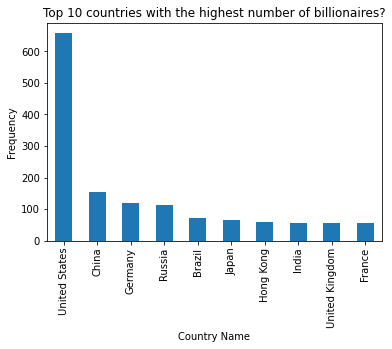

In [ ]:
df[["name","location.citizenship"]].drop_duplicates(keep = "first")["location.citizenship"].value_counts()[:10].plot(kind = "bar");
plt.title("Top 10 countries with the highest number of billionaires?");
plt.xlabel("Country Name");
plt.ylabel("Frequency");

Q) What industries/sectors are most successful?


In [ ]:
# There are left spaces in sector column making " retail" and "retail" different. We are removing that space.
df["company.sector"] = df["company.sector"].apply(lambda x : x if pd.isnull(x) else x.strip())


In [ ]:
df[["company.name", "company.sector"]].drop_duplicates(keep = "first")["company.sector"].value_counts()[:20]

real estate           128
retail                 71
media                  63
pharmaceuticals        60
construction           56
banking                54
hedge funds            42
oil                    39
software               35
groceries              23
technology             21
shipping               18
mining                 18
private equity         17
electronics            16
insurance              16
steel                  15
investment banking     13
entertainment          12
fashion                12
Name: company.sector, dtype: int64

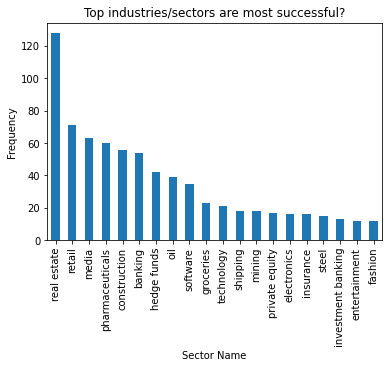

In [ ]:
df[["company.name", "company.sector"]].drop_duplicates(keep = "first")["company.sector"].value_counts()[:20].plot(kind = "bar");
plt.title("Top industries/sectors are most successful?");
plt.xlabel("Sector Name");
plt.ylabel("Frequency");

Q) What are the main industries with the highest number of women billionaires?


In [ ]:
female_df = df[df["demographics.gender"]=="female"]
print("Main industries with the highest number of women billionaires")
female_df[["company.sector", "company.name"]].drop_duplicates()["company.sector"].value_counts()[:20]

Main industries with the highest number of women billionaires


retail                   9
real estate              9
media                    8
construction             7
pharmaceuticals          5
banking                  5
fashion                  4
mining                   3
groceries                3
electronics              3
cosmetics                2
healthcare management    2
shipping                 2
paper                    2
publishing               2
steel                    2
medical supplies         2
restaurant               2
casinos                  2
clothing                 2
Name: company.sector, dtype: int64

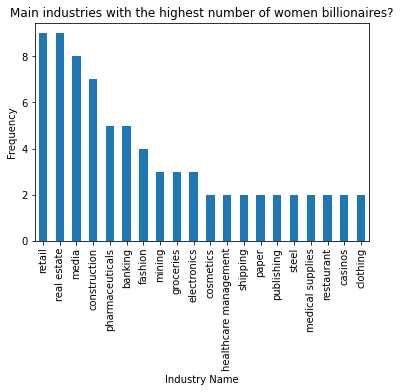

In [ ]:
female_df[["company.sector", "company.name"]].drop_duplicates()["company.sector"].value_counts()[:20].plot(kind = "bar");
plt.title("Main industries with the highest number of women billionaires?");
plt.xlabel("Industry Name");
plt.ylabel("Frequency");

Q) What age range represents the highest and lowest number of billionaires?


In [ ]:
li = []

for age in range(len(df["demographics.age"])):

    if df.iloc[age]['demographics.age'] >=0 and df.iloc[age]['demographics.age'] <=5:
        li.append('0-5')
    elif df.iloc[age]['demographics.age'] > 5 and df.iloc[age]['demographics.age'] <=10:
        li.append('5-10')
    elif df.iloc[age]['demographics.age'] > 10 and df.iloc[age]['demographics.age'] <=15:
        li.append('10-15')
    elif df.iloc[age]['demographics.age'] > 15 and df.iloc[age]['demographics.age'] <=20:
        li.append('15-20')
    elif df.iloc[age]['demographics.age'] > 20 and df.iloc[age]['demographics.age'] <=25:
        li.append('20-25')
    elif df.iloc[age]['demographics.age'] > 25 and df.iloc[age]['demographics.age'] <=30:
        li.append('25-30')
    elif df.iloc[age]['demographics.age'] > 30 and df.iloc[age]['demographics.age'] <=35:
        li.append('30-35')
    elif df.iloc[age]['demographics.age'] > 35 and df.iloc[age]['demographics.age'] <=40:
        li.append('35-40')
    elif df.iloc[age]['demographics.age'] > 40 and df.iloc[age]['demographics.age'] <=45:
        li.append('40-45')
    elif df.iloc[age]['demographics.age'] > 45 and df.iloc[age]['demographics.age'] <=50:
        li.append('45-50')
    elif df.iloc[age]['demographics.age'] > 50 and df.iloc[age]['demographics.age'] <=55:
        li.append('50-55')
    elif df.iloc[age]['demographics.age'] > 55 and df.iloc[age]['demographics.age'] <=60:
        li.append('55-60')
    elif df.iloc[age]['demographics.age'] > 60 and df.iloc[age]['demographics.age'] <=65:
        li.append('60-65')
    elif df.iloc[age]['demographics.age'] > 65 and df.iloc[age]['demographics.age'] <=70:
        li.append('65-70')
    elif df.iloc[age]['demographics.age'] > 70 and df.iloc[age]['demographics.age'] <=75:
        li.append('70-75')
    elif df.iloc[age]['demographics.age'] > 75 and df.iloc[age]['demographics.age'] <=80:
        li.append('75-80')
    elif df.iloc[age]['demographics.age'] > 80 and df.iloc[age]['demographics.age'] <=85:
        li.append('80-85')
    elif df.iloc[age]['demographics.age'] > 85 and df.iloc[age]['demographics.age'] <=90:
        li.append('85-90')
    elif df.iloc[age]['demographics.age'] > 90 and df.iloc[age]['demographics.age'] <=95:
        li.append('90-95')
    elif df.iloc[age]['demographics.age'] > 95 and df.iloc[age]['demographics.age'] <=100:
        li.append('95-100')
    elif df.iloc[age]['demographics.age'] > 100 and df.iloc[age]['demographics.age'] <=105:
        li.append('100-105')
    else:
        li.append("wrong_age")
        
df["age_group"] = li


In [ ]:
df.groupby("age_group").agg({"company.name" : "count"})

,company.name
age_group,
0-5,362
10-15,1
20-25,3
25-30,10
30-35,31
35-40,45
40-45,106
45-50,244
50-55,248


> We can see age group 0-5 has the highest number of billionaires.
Whereas 95-100 has the least. Ignoring wrong_age for now. Wrong_age has the ages which are given negative here and age cannot be negative.

In [ ]:
df.drop("age_group", axis = 1, inplace = True)

## Additional factors

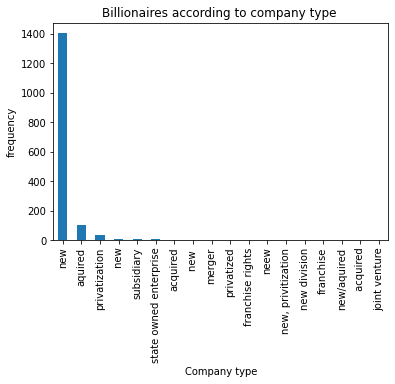

In [ ]:
df[["company.type", "company.name"]].drop_duplicates()["company.type"].value_counts().plot(kind = "bar");
plt.title("Billionaires according to company type ");
plt.xlabel("Company type");
plt.ylabel("frequency");

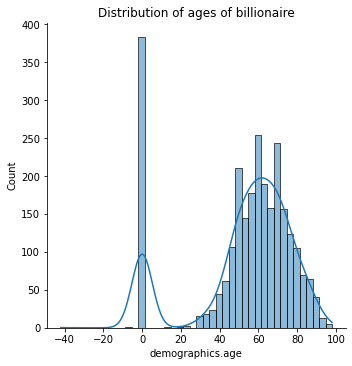

In [ ]:
sns.displot(df["demographics.age"], kde = True);
plt.title("Distribution of ages of billionaire");

### Task 1

Problem Domain, Data Description, and Research Question.


### Problem Domain
> The dataset contains information on billionaires from all across the world telling particulars about these billionaires like what are their ranks in terms of wealth year wise, whats the company name, what sector do they belong to, what was their age at that time, what position were they holding, etc.

### Data Description: 

name - Name of the billionaire

rank - Rank in terms of wealth for that year.

year - Year in which data was collected for.

company.founded - Foundation year.

company.name- Name of the company.

company.relationship - Position or how the individual is associated with the company.

company.sector - Tells the sector of the company.

company.type- Tells the type of the company.

demographics.age - Age of the individual in the year data was collected.

demographics.gender- Gender of the individual.

location.citizenship- Citizenship of the individual.

location.country code - Country code for the region.

location.gdp- GDP of that country.

location.region- Region.

wealth.type - Tells the type of wealth.

wealth.worth in billions - Tells about the worth of billionaire in billions

wealth.how.category- Tells about the category in which company is dealing in

mealth.how.industry-  Tells about the industry in which company is dealing in

wealth.how.inherited - Tells if wealth was inherited or not.

wealth.how.was political- Tells if founder was political or not.

## Task 2

Six big data analysis techniques:

1. A/B testing
This data analysis technique involves comparing a control group with a variety of test groups, in order to discern what treatments or changes will improve a given objective variable. McKinsey gives the example of analysing what copy, text, images, or layout will improve conversion rates on an e-commerce site.12 Big data once again fits into this model as it can test huge numbers, however, it can only be achieved if the groups are of a big enough size to gain meaningful differences.

2. Data fusion and data integration
By combining a set of techniques that analyse and integrate data from multiple sources and solutions, the insights are more efficient and potentially more accurate than if developed through a single source of data.

3. Data mining
A common tool used within big data analytics, data mining extracts patterns from large data sets by combining methods from statistics and machine learning, within database management. An example would be when customer data is mined to determine which segments are most likely to react to an offer.

4. Machine learning
Well known within the field of artificial intelligence, machine learning is also used for data analysis. Emerging from computer science, it works with computer algorithms to produce assumptions based on data.14 It provides predictions that would be impossible for human analysts.

5. Natural language processing (NLP).
Known as a subspecialty of computer science, artificial intelligence, and linguistics, this data analysis tool uses algorithms to analyse human (natural) language.15

6. Statistics.
This technique works to collect, organise, and interpret data, within surveys and experiments.

Other data analysis techniques include spatial analysis, predictive modelling, association rule learning, network analysis and many, many more. The technologies that process, manage, and analyse this data are of an entirely different and expansive field, that similarly evolves and develops over time. 


The chosen methodology here is A/B testing and statistics. We would form multiple hypothesis and then evaluate them.

We would be evaluating hypothesis like: Is the feature age normally distributed?, Do we get male/female billionaires depending on countries? Is there a connection between the two?, and  Is there a relationship between wealth of a billionaire and if he has inherited that wealth or not?.


We would be using shapiro wilk test, chi square test and F one way test to evaluate the formed hypothesis.

### Task 3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [ ]:
df.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [ ]:
df.shape

(2614, 22)

In [ ]:
# No duplicate rows
df[df.duplicated()]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political


In [ ]:
#checking for null values feature wise
print("Percentage of null values feature wise: ")
print()
for column, null_val in zip(df.isnull().sum().index, df.isnull().sum().values):
    print(column,": ", (null_val/df.shape[0])*100,"%")
    print()


Percentage of null values feature wise: 

name :  0.0 %

rank :  0.0 %

year :  0.0 %

company.founded :  0.0 %

company.name :  1.4537107880642692 %

company.relationship :  1.7597551644988525 %

company.sector :  0.8798775822494262 %

company.type :  1.3771996939556235 %

demographics.age :  0.0 %

demographics.gender :  1.300688599846978 %

location.citizenship :  0.0 %

location.country code :  0.0 %

location.gdp :  0.0 %

location.region :  0.0 %

wealth.type :  0.8416220351951033 %

wealth.worth in billions :  0.0 %

wealth.how.category :  0.03825554705432287 %

wealth.how.from emerging :  0.0 %

wealth.how.industry :  0.03825554705432287 %

wealth.how.inherited :  0.0 %

wealth.how.was founder :  0.0 %

wealth.how.was political :  0.0 %



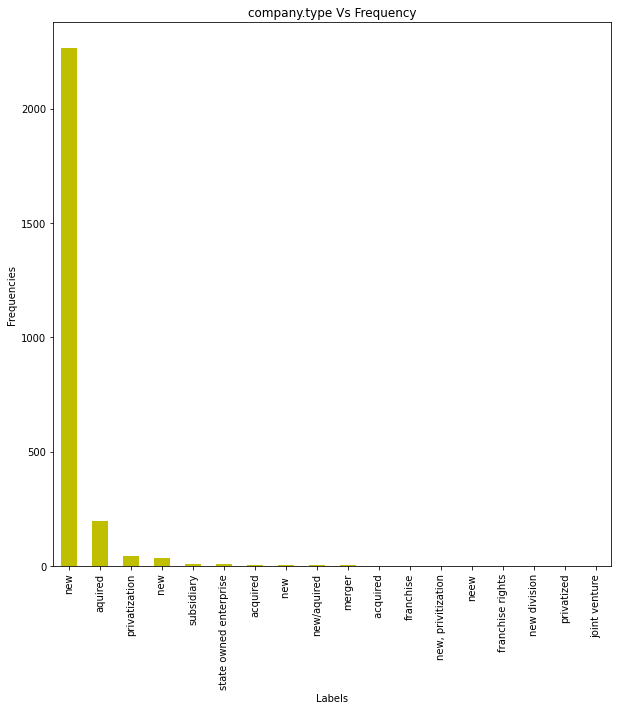

Feature "company.type" has highest frequency for the class: new
Feature "company.type" has lowest frequency for the class: joint venture


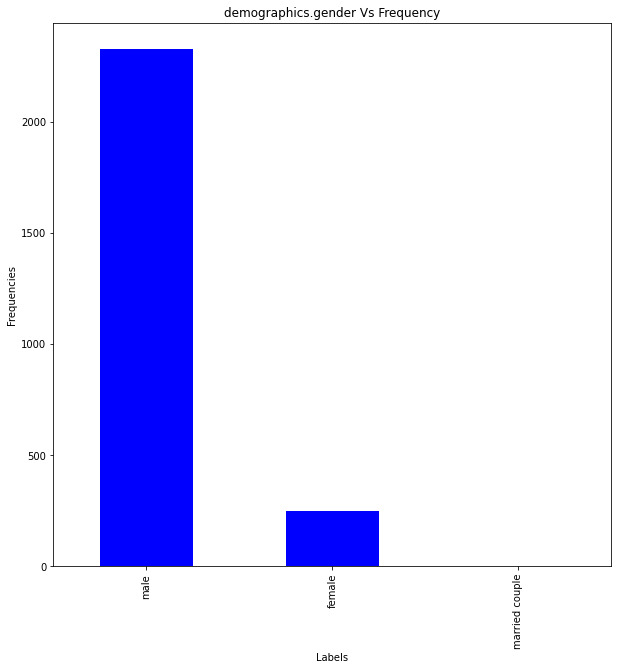

Feature "demographics.gender" has highest frequency for the class: male
Feature "demographics.gender" has lowest frequency for the class: married couple


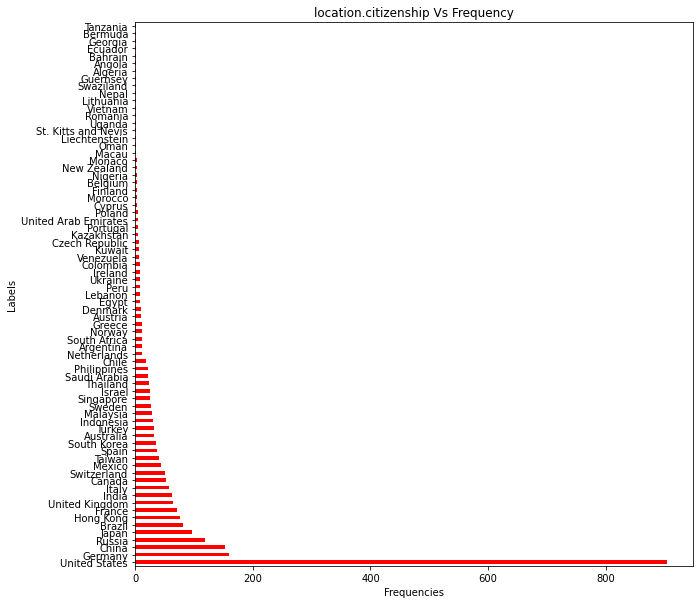

Feature "location.citizenship" has highest frequency for the class: United States
Feature "location.citizenship" has lowest frequency for the class: Tanzania


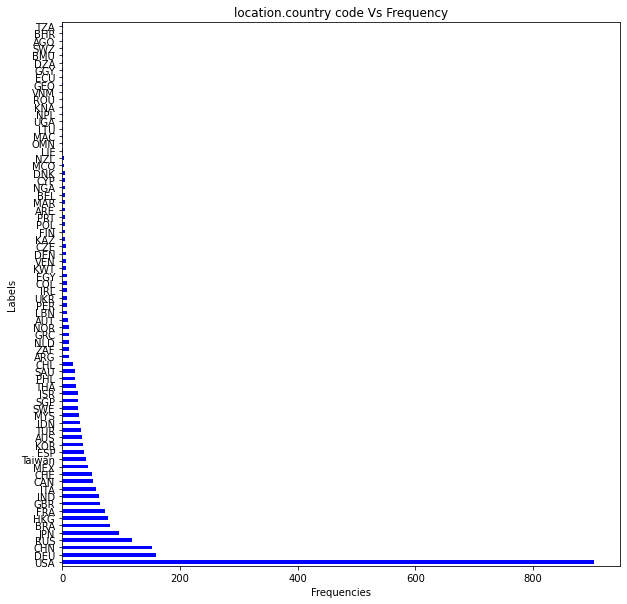

Feature "location.country code" has highest frequency for the class: USA
Feature "location.country code" has lowest frequency for the class: TZA


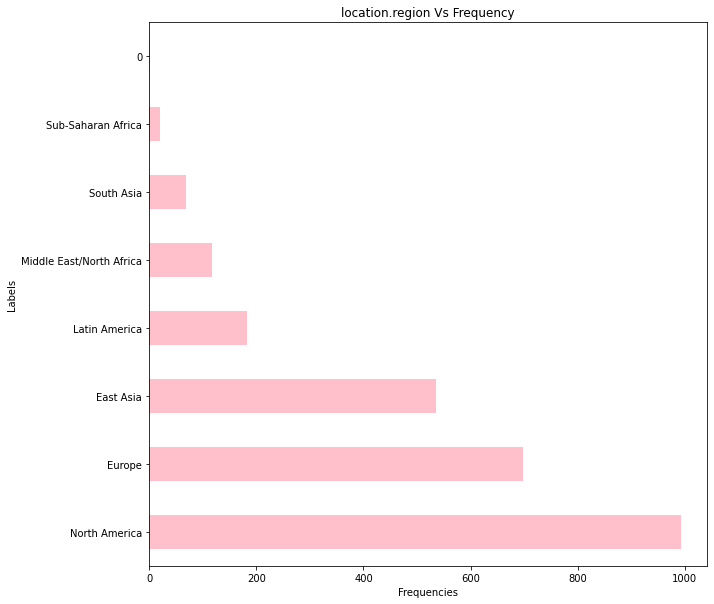

Feature "location.region" has highest frequency for the class: North America
Feature "location.region" has lowest frequency for the class: 0


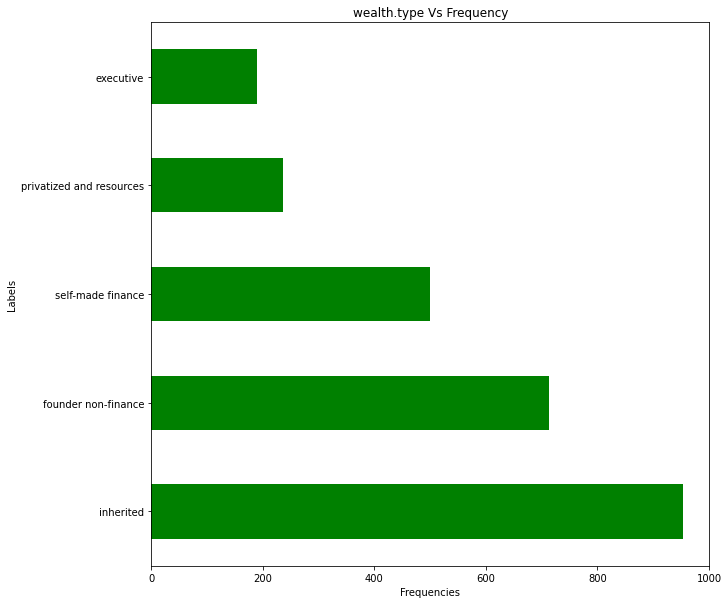

Feature "wealth.type" has highest frequency for the class: inherited
Feature "wealth.type" has lowest frequency for the class: executive


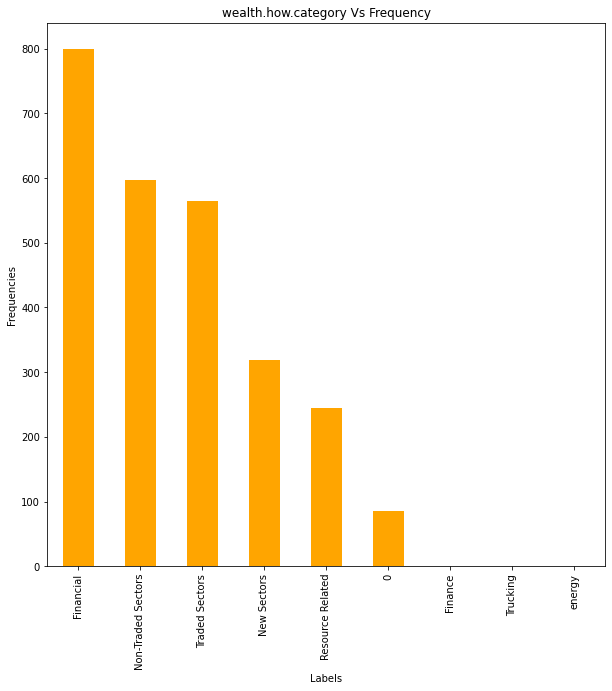

Feature "wealth.how.category" has highest frequency for the class: Financial
Feature "wealth.how.category" has lowest frequency for the class: energy


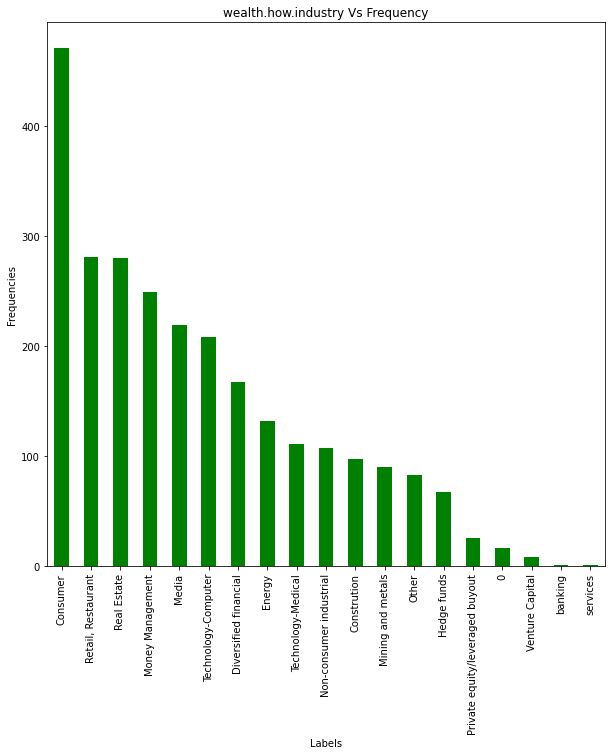

Feature "wealth.how.industry" has highest frequency for the class: Consumer
Feature "wealth.how.industry" has lowest frequency for the class: services


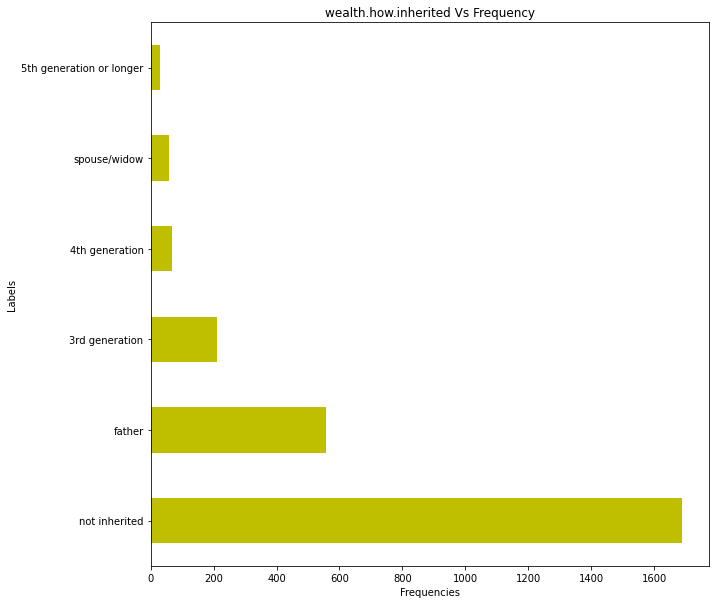

Feature "wealth.how.inherited" has highest frequency for the class: not inherited
Feature "wealth.how.inherited" has lowest frequency for the class: 5th generation or longer


In [ ]:

# Getting out the categorical variables
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]

for col in df.columns:
    if df[col].nunique()==2:
        categorical_cols.extend([col])

continuous_cols = list(set(df.columns) - set(categorical_cols))



color = ["r", "y", "g", "b", "orange", "pink", "b"]
orientation = ["horizontal", "vertical"]

for c, col in enumerate(['company.type', 'demographics.gender', 'location.citizenship', 'location.country code', 'location.region', 'wealth.type', 'wealth.how.category', 'wealth.how.industry', 'wealth.how.inherited', ]):
    univariate_valueplot(df, col, orientation[random.randint(0, len(orientation)-1)], (10,10), color[random.randint(0, len(color)-1)])


> Most billionaires did not inherit their wealth.

> Consumer industry has generated the most billionaire industrialists whereas services has generated the least.

> Financial category has generated the most billionaire whereas energy category has generated the least.

> Inherited Wealth type has generated the most billionaire whereas executive has generated the least.

> most billionaire come from North America.

> New company type has generated the most billionaire.

#### Correlation between categorical variables

In [ ]:
contin_corr = df[["year", "company.founded", "demographics.age", "wealth.worth in billions", "location.gdp"]].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(contin_corr, annot=True, ax=ax)
ax.set_title("Correlation between Continuous Variables")
plt.show()

NameError: ignored

> No strong correlation can be seen here.

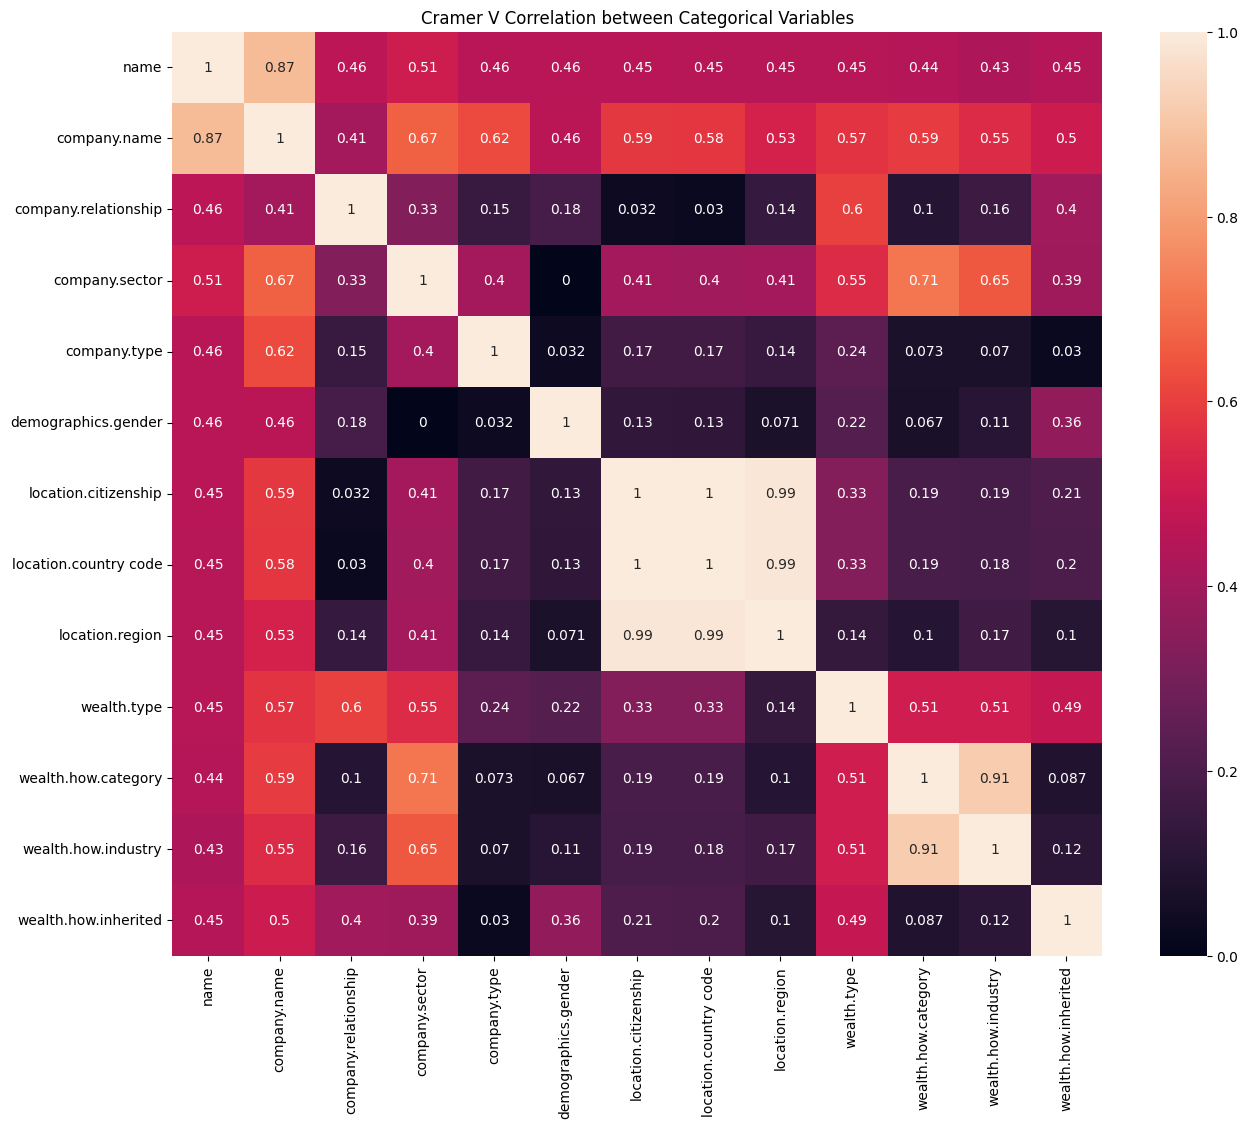

In [ ]:


correlation_matrix = np.zeros((len(categorical_cols),len(categorical_cols)))

for column1, column2 in itertools.combinations(set(categorical_cols), 2):
    index1, index2 = categorical_cols.index(column1), categorical_cols.index(column2)
    correlation_matrix[index1, index2] = cramers_corrected_stat_for_heatmap(pd.crosstab(df[column1], df[column2]))
    correlation_matrix[index2, index1] = correlation_matrix[index1, index2]
    
corr = pd.DataFrame(correlation_matrix, index = categorical_cols, columns = categorical_cols)

for i in range(corr.shape[0]):
    corr.iloc[i][i] = 1

fig, ax = plt.subplots(figsize=(15, 12))

ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Categorical Variables");


Very strong correlations can be seen here between categorical variables.

## Hypothesis 1: Is the feature age normally distributed?

### Checking Normality in the data

- Null Hypothesis: H0: The feature/variable is normally distributed.

- Alternate Hypothesis: HA: The feature/variable is not normally distributed.



In [ ]:

check_normality(df, "demographics.age")

Value of statistic is : 0.8482258319854736, and p-value is: 1.401298464324817e-44

'demographics.age' is not normally distributed. Hence, (reject H0), alternate hypothesis is true.


<AxesSubplot: xlabel='demographics.age', ylabel='Count'>

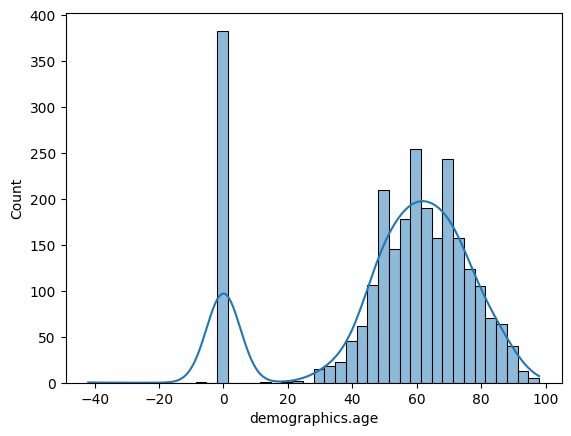

In [ ]:
#### lets cross check it also using a histogram
sns.histplot(df["demographics.age"], kde = True)

> It can be observed the distribution is not normal in nature.

### Hypothesis 2 : Do we get male/female billionaires depending on countries? Is there a connection between the two?

Null hypothesis, H0: There is no relationship between gender and countries for billionaire.
    
Alternate Hypotheis, HA: There is a relationship between gender and countries for billionaire.

#### Approaches Taken (chi-square test):

 
Approach 1: The p-value approach to hypothesis testing in the decision rule

Approach 2: The critical value approach to hypothesis testing in the decision rule


In [ ]:
gender_vs_country = df[["demographics.gender", "location.country code"]]
# Dropping any null values (here 20 rows would be dropped)
gender_vs_country = gender_vs_country.dropna()

data_crosstab=pd.crosstab(gender_vs_country["demographics.gender"], gender_vs_country["location.country code"],
                         margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows, columns = gender_vs_country['demographics.gender'].unique(), gender_vs_country['location.country code'].unique()

for c in columns:
    for r in rows:
        Observed = data_crosstab[c][r]
        Expected = data_crosstab[c]['Total'] * data_crosstab['Total'][r] / data_crosstab['Total']['Total']
        
        chi_square+= (Observed-Expected)**2/Expected

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis, there is no relationship between 2 categorical variables"

if p_value <= alpha:
    conclusion = "Reject H0, there is a relationship between 2 categorical variables"
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis, there is no relationship between 2 categorical variables"
if chi_square > critical_value:
    conclusion = "Reject H0, there is a relationship between 2 categorical variables"
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 230.39223178263575  and p value is: 1.0438824658898227e-05
Reject H0, there is a relationship between 2 categorical variables

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 230.39223178263575  and critical value is: 175.1975672562814
Reject H0, there is a relationship between 2 categorical variables


### Hypothesis 3 : Is there a relationship between wealth of a billionaire and if he has inherited that wealth or not?



Null hypothesis, H0: There is no relationship between wealth and inheritance for billionaire.
    
Alternate Hypotheis, HA: There is a relationship between wealth and inheritance for billionaire.

### Approach taken

It tell whether two or more groups are similar or not based on their mean similarity and f-score.


In [ ]:
classes_ = pd.unique(df["wealth.how.inherited"].values)
inheritance_vs_wealth = {grp:df['wealth.worth in billions'][df["wealth.how.inherited"] == grp] for grp in classes_}

f, p = stats.f_oneway(inheritance_vs_wealth['not inherited'], inheritance_vs_wealth['3rd generation'], inheritance_vs_wealth['father'], inheritance_vs_wealth['spouse/widow'], inheritance_vs_wealth['5th generation or longer'], inheritance_vs_wealth['4th generation'], )
print("p-value for significance is: ", p)
print()
if p<0.05:
    print("Reject H0, there is a relationship between 2 categorical variables")
else:
    print("Failed to reject the null hypothesis, there is no relationship between 2 categorical variables")

p-value for significance is:  0.03912831080560617

Reject H0, there is a relationship between 2 categorical variables


## Task 4

> The results suggest inherited people become billionaires quickly. The results suggest people who have not inherited wealth have to work harder to become billionaires.

> Similarly the results also suggest regions from which billionaires are coming is dependent on gender. People from where we see only male billionaires need to catch up with new female billionaires and vice versa.

> The limitations can be there is bias in the data. For instance, we have 2328 samples of male and just 249 samples of females. We need more balanced data.

> In future, we can create machine learning models to predict the wealth of a new billionaire given the other features. We can also do clustering to see what type of billionaires gets clubbed together.`m